In [8]:
import numpy as np
import pandas as pd
import jieba
stop_word = pd.read_csv('停用词.csv',names=['w'],sep='\t',encoding='utf-8')
view=pd.read_csv('景点(无特殊字符).csv',encoding='utf-8')
view=view.dropna().reset_index().drop('index',axis=1)

#for i in range(len(view.txt)):
    #view.txt[i]=(' '.join([w for w in jieba.cut(view.txt[i]) if w not in list(stop_word.w)]))
view

,spot,txt
0,秦始皇帝陵博物院（兵马俑）,又遇好人[强][强] 我是汉中来西安的游客。今日去西安项王营游玩，将手机遗失在景区。遇好人，...
1,秦始皇帝陵博物院（兵马俑）,秦始皇兵马俑博物馆门票贵一点为了加强对中国历史成就够要给更多人了解和学习做为爱国主义教育基地...
2,秦始皇帝陵博物院（兵马俑）,表示看不懂就是吃的地方多
3,秦始皇帝陵博物院（兵马俑）,相当震撼啊
4,秦始皇帝陵博物院（兵马俑）,没去成无法点评
...,...,...
62899,汉阴凤堰古梯田景区,在漩涡镇是这样吃的很美味吧
62900,汉阴凤堰古梯田景区,地方不错值得去看看春天有春天的景色夏天有夏天的景色冬天更美
62901,汉阴凤堰古梯田景区,值得凤堰梯天好似天阶令人赏心悦目
62902,汉阴凤堰古梯田景区,是很具陕南梯田风光的象征适宜在金秋时节休闲游也适宜在春天油菜花开的季节


In [16]:
view=view[view['txt']!='']
view

,spot,txt
0,秦始皇帝陵博物院（兵马俑）,又遇好人[强][强] 我是汉中来西安的游客。今日去西安项王营游玩，将手机遗失在景区。遇好人，...
1,秦始皇帝陵博物院（兵马俑）,秦始皇兵马俑博物馆门票贵一点为了加强对中国历史成就够要给更多人了解和学习做为爱国主义教育基地...
2,秦始皇帝陵博物院（兵马俑）,表示看不懂就是吃的地方多
3,秦始皇帝陵博物院（兵马俑）,相当震撼啊
4,秦始皇帝陵博物院（兵马俑）,没去成无法点评
...,...,...
62899,汉阴凤堰古梯田景区,在漩涡镇是这样吃的很美味吧
62900,汉阴凤堰古梯田景区,地方不错值得去看看春天有春天的景色夏天有夏天的景色冬天更美
62901,汉阴凤堰古梯田景区,值得凤堰梯天好似天阶令人赏心悦目
62902,汉阴凤堰古梯田景区,是很具陕南梯田风光的象征适宜在金秋时节休闲游也适宜在春天油菜花开的季节


In [19]:
from snownlp import SnowNLP
# 加载情感分析模块
from snownlp import sentiment

for i in range(len(view.txt)):
    if SnowNLP(view.txt[i]).sentiments < 0.3:  # 可以自定义范围
        #print(i+'这是一个负面评价')
        #print(SnowNLP(i).sentiments)
        view.loc[i,'atti']=0

    elif SnowNLP(view.txt[i]).sentiments > 0.8:  # 可以自定义范围
        #print(i+'这是一个正面评价')
        #print(SnowNLP(i).sentiments)
        view.loc[i,'atti']=1
    else:
        view.loc[i,'atti']=0.5

In [7]:
from snownlp import SnowNLP
# 加载情感分析模块
from snownlp import sentiment
for i in range(len(view.txt)):
    view.loc[i,'atti']=SnowNLP(view.txt[i]).sentiments

In [64]:
view.groupby(by='atti').count()

,spot,txt
atti,,
0.0,156,156
0.5,235,235
1.0,1154,1154


In [16]:
view.iloc[220:240,:]

,spot,txt,atti
220,陕西自然博物馆,陕西自然博物馆和陕西电视塔在一个地方同处地铁二号线电视塔站其中自然馆和电视塔需要各自分别购票...,1.000000
221,陕西自然博物馆,小朋友很喜欢,0.901707
222,陕西自然博物馆,可以很方便,0.673268
223,陕西自然博物馆,可以方便,0.526233
224,陕西自然博物馆,宝贝玩的很开心看到恐龙化石特别兴奋,0.999970
225,陕西自然博物馆,先去自然馆一个一个馆逛仔细看要两个小时煤的发展史模拟煤矿井恐龙化石珍稀动物化石植物化石然后到...,1.000000
226,陕西自然博物馆,非常实惠非常超值,0.991836
227,鼓楼,西安市市中心景色很美外地游客来旅游参观的很多很喜欢,0.994675
228,鼓楼,整个广场是一个下沉式的广场两边分别是钟楼跟鼓楼遥遥相对广场下边是地铁站两边有很多的店铺而且有...,0.999464
229,鼓楼,听介绍说这里是西安的市中心但是感觉也太一般般了吧就是一个比较大的广场中路跟鼓楼遥遥相对虽然是...,0.999808


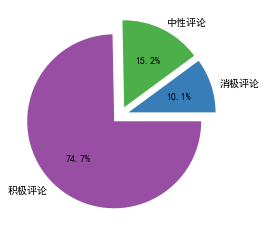

In [20]:
#饼图
import matplotlib.pyplot as plt                #导入绘图包

plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

pro=[156/1545,235/1545,1154/1545]
explode = (0.1,0.1,0.1)
colors = ["#377eb8","#4daf4a","#984ea3"]
plt.pie(pro, explode=explode,colors=colors,autopct="%3.1f%%",labels=['消极评论','中性评论','积极评论'])  #以时间为标签，总计成交笔数为数据绘制饼图，并显示3位整数一位小数

plt.savefig('motion.pdf',dpi=300)
plt.show()

In [11]:
# 直接输出为数据框 每个词条为一行，每一个章节为一列
t2d = pd.crosstab(df0.word, df0.chap)
t2d.head(10)

chap,0,1,2,4,5,6,7,8,9,10,...,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544
word,,,,,,,,,,,,,,,,,,,,,
一下子,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一世,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一丝,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一两,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一个个,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一个多,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一个集,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一举两得,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
一举多得,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 计算各词条的总出现频次,进行低频词删减
totnum = t2d.agg(func = 'sum', axis=1)
t2dclean = t2d.iloc[list(totnum >= 10)]
t2dclean.T
#len(t2dclean)

word,一体,一圈,一处,一座,一游,一点,一种,一路,三个,上山,...,项目,风景,风景优美,风景区,香山,高山,鬼斧神工,黄帝,黄河,鼓楼
chap,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
t2dclean = t2d.iloc[list(totnum >= 10)]
t2dclean.T
#len(t2dclean)

word,一体,一圈,一处,一座,一游,一点,一种,一路,三个,上山,...,项目,风景,风景优美,风景区,香山,高山,鬼斧神工,黄帝,黄河,鼓楼
chap,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. 找一个自己喜欢的网络文档，进行分词后，开展如下练习。

（1）构建词袋模型，将代码贴于下方：

（2）构建2-gram模型，将代码贴于下方：

（3）构建Word2Vec模型，将代码贴于下方：


2. 分别基于上述三种模型，计算词语相似度。
找2个词语，利用三种算法，计算其最相似的前5个词语。
请比较三种算法的异同。并说明这三种算法可能应用于什么场景。

## 构建词袋模型

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(min_df=5) # 在两个以上文档中出现的才保留
analyze = countvec.build_analyzer()
analyze(views.txt[1])

['服务', '深刻', '到位', '秦始皇', '兵马俑', '介绍', '详细', '乐乐', '棒棒']

In [15]:
#使用CountVector构建词袋模型
from sklearn.feature_extraction.text import CountVectorizer
#语料
corpus = m_cut(views.txt[1])
#将文本中的词转换成词频矩阵
vectorizer = CountVectorizer()
print(vectorizer)
#计算某个词出现的次数
X = vectorizer.fit_transform(corpus)
print(type(X),X)
#获取词袋中所有文本关键词
word = vectorizer.get_feature_names()
print(word)
#查看词频结果
print(X.toarray())

CountVectorizer()
<class 'scipy.sparse.csr.csr_matrix'>   (0, 4)	1
  (1, 6)	1
  (2, 3)	1
  (3, 7)	1
  (4, 2)	1
  (5, 1)	1
  (6, 8)	1
  (7, 0)	1
  (8, 5)	1
['乐乐', '介绍', '兵马俑', '到位', '服务', '棒棒', '深刻', '秦始皇', '详细']
[[0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]]


In [16]:
rawchap = [ " ".join(m_cut(w)) for w in views.txt]
#rawchap[0]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(min_df = 5) # 在5个以上章节中出现的才保留

res = countvec.fit_transform(rawchap)
res.todense()
res.shape

(1545, 749)

In [ ]:
corpus=countvec.get_feature_names()
corpus_dict = dict(zip(corpus, range(len(corpus))))

诸葛亮
庙宇
纪念
瀑布


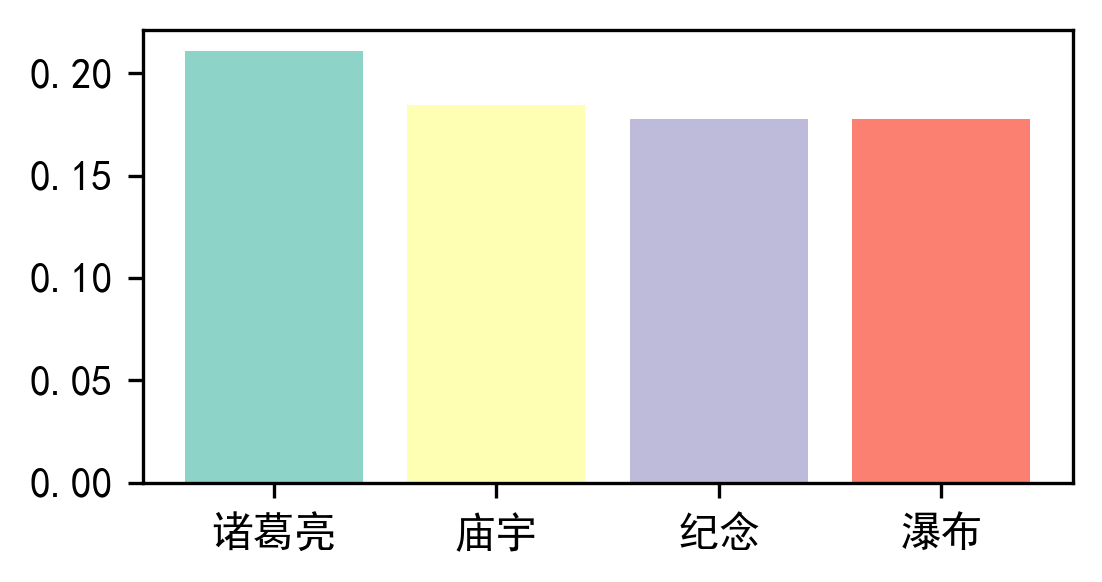

In [50]:
from scipy import spatial
import numpy as np
w='壮观'

vec1 = res.todense()[:,corpus.index(w)]
cos_sim=[]
for i in range(res.shape[1]):
    vec2 = res.todense()[:,i]
    cos_sim.append(1 - spatial.distance.cosine(vec1, vec2))
cos_sim=np.asarray(cos_sim)
top_idx = cos_sim.argsort()[-1:-6:-1]
TopBER = cos_sim[top_idx]

from matplotlib import pyplot as plt
plt.rcParams ['font.sans-serif'] = ['Simhei'] 
l=[]
for i in top_idx[1:]:
    print(corpus[i])
    l.append(corpus[i])

plt.figure(dpi=300)
plt.bar(l,TopBER[1:],color=plt.get_cmap('Set3')(range(4)))
plt.savefig(w+'.pdf')

In [134]:
len(corpus_dict)

749

### 基于词袋模型计算词语相似度

In [113]:
# 建立句子的向量表示
def vector_rep(text, corpus_dict):
    vec = []
    for key in corpus_dict.keys():
        if key in text:
            vec.append((corpus_dict[key], text.count(key)))
        else:
            vec.append((corpus_dict[key], 0))

    vec = sorted(vec, key= lambda x: x[0])

    return vec

In [114]:
from math import sqrt
from nltk import word_tokenize
#计算方式：余弦相似度
def similarity_with_2_sents(vec1, vec2):
    inner_product = 0
    square_length_vec1 = 0
    square_length_vec2 = 0
    for tup1, tup2 in zip(vec1, vec2):
        inner_product += tup1*tup2
        square_length_vec1 += tup1**2
        square_length_vec2 += tup2**2
    return (inner_product/sqrt(square_length_vec1*square_length_vec2))

In [149]:
vec1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [148]:
sent1 = "壮观"
sent2 = "好看"

sents = [sent1, sent2]
texts = [[word for word in m_cut(sent)] for sent in sents]

vec1 = vector_rep(texts[0], corpus_dict)
vec2 = vector_rep(texts[1], corpus_dict)
#print(vec1)
#print(vec2)

vec1 = [ i[1] for i in vec1]
vec2 = [ i[1] for i in vec2]

cosine_sim = similarity_with_2_sents(vec1, vec2)
print('两个词语的余弦相似度为： %.4f。'%cosine_sim)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0),

https://blog.csdn.net/TFATS/article/details/108516903

## 2-gram模型

N-gram是一种基于统计语言模型的算法。它的基本思想是将文本里面的内容按照字节进行大小为N的滑动窗口操作，形成了长度是N的字节片段序列。

每一个字节片段称为gram，对所有gram的出现频度进行统计，并且按照事先设定好的阈值进行过滤，形成关键gram列表，也就是这个文本的向量特征空间，列表中的每一种gram就是一个特征向量维度。

该模型基于这样一种假设，第N个词的出现只与前面N-1个词相关，而与其它任何词都不相关，整句的概率就是各个词出现概率的乘积。

In [117]:
df2.to_csv('乡村振兴.csv')

In [116]:
m_cut(views.txt[2])

['乐乐', '热情', '大方', '旅途', '愉快', '开心']

In [53]:
import pandas as pd
import re
import jieba
from collections import Counter

words_list=[]
for i in range(len(views.txt)):
    words_list.extend(m_cut(views.txt[i]))
    
words_count = Counter(words_list)
TOKENS_2GRAM = [''.join(words_list[i:i+2]) for i in range(len(words_list)-1)]
words_count2 = Counter(TOKENS_2GRAM)

words_list_len = len(words_list)
unique_words_len = len(words_count)
unique_bigram_len = len(words_count2)

In [51]:
# 计算词独立出现的概率，采用拉普拉斯平滑
def prob_1(word):
    return (words_count[word] + 1) / (words_list_len + unique_words_len)

# 计算条件概率，采用拉普拉斯平滑
def prob_2(word1, word2):
    return (words_count2[word1+word2] + 1) / (words_count[word1] + unique_bigram_len)

# 构建2-gram语言模型
def bigram_model(sentence):
    words = list(jieba.cut(sentence))
    probility = prob_1(words[0])
    for index in range(len(words)-1):
        probility *= prob_2(words[index], words[index+1])
    return probility

In [60]:
list(words_count.keys())[0]

'乐乐'

In [ ]:
conmat=[]
for i in range(unique_words_len):
    conmat.append([])
    for j in range(unique_words_len):
            conmat[i].append(prob_2(list(words_count.keys())[i],list(words_count.keys())[j]))    

#### 两个概率之和即为“产业”和“发展”两个词的相似度，以下同理

In [110]:
sent1 = "乡村振兴"
sent2 = "振兴乡村"

print(bigram_model(sent1))
print(bigram_model(sent2))

0.0002959948608475984
3.972243850999495e-06


In [111]:
sent1 = "建设振兴"
sent2 = "振兴建设"

print(bigram_model(sent1))
print(bigram_model(sent2))

2.2537218402709204e-08
1.6513822751346216e-06


In [120]:
sims

[(185523, 0.2577213644981384),
 (362314, 0.24807268381118774),
 (148003, 0.2306838184595108),
 (106800, 0.22978167235851288),
 (166337, 0.22757962346076965),
 (280006, 0.22682426869869232),
 (22406, 0.2266799807548523),
 (344002, 0.22389617562294006),
 (122645, 0.2191760390996933),
 (20999, 0.2175426483154297)]

In [20]:
words_list[148003]

'完善'

In [22]:
tag_list

[TaggedDocument(words='近年来', tags=[0]),
 TaggedDocument(words='中国银行', tags=[1]),
 TaggedDocument(words='青岛市', tags=[2]),
 TaggedDocument(words='分行', tags=[3]),
 TaggedDocument(words='以下', tags=[4]),
 TaggedDocument(words='简称', tags=[5]),
 TaggedDocument(words='青岛', tags=[6]),
 TaggedDocument(words='中行', tags=[7]),
 TaggedDocument(words='积极探索', tags=[8]),
 TaggedDocument(words='金融', tags=[9]),
 TaggedDocument(words='支持', tags=[10]),
 TaggedDocument(words='乡村', tags=[11]),
 TaggedDocument(words='振兴', tags=[12]),
 TaggedDocument(words='路径', tags=[13]),
 TaggedDocument(words='做强', tags=[14]),
 TaggedDocument(words='特色', tags=[15]),
 TaggedDocument(words='领域', tags=[16]),
 TaggedDocument(words='做优', tags=[17]),
 TaggedDocument(words='服务', tags=[18]),
 TaggedDocument(words='创新', tags=[19]),
 TaggedDocument(words='品牌', tags=[20]),
 TaggedDocument(words='建设', tags=[21]),
 TaggedDocument(words='促进', tags=[22]),
 TaggedDocument(words='农业', tags=[23]),
 TaggedDocument(words='高质', tags=[24]),
 Tag

In [121]:
import jieba
import gensim
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
TaggededDocument = gensim.models.doc2vec.TaggedDocument

tag_list = []
cut_list = words_list

for i, text in enumerate(cut_list):
    length = len(text)
    document = TaggededDocument(text, tags=[i])  # 给每一行的句子打个标签为i
    tag_list.append(document)

model_dm = Doc2Vec(tag_list, min_count=1, window=3, vector_size=200, sample=1e-3, negative=5, workers=4)

In [126]:
inferred_vector_dm = model_dm.infer_vector(['爬山'])
sims = model_dm.docvecs.most_similar([inferred_vector_dm], topn=10) # 找出相似度最高的十个句子
print(sims)

print('与该词最相似的十个词语为:')
for count, sim in sims:
    sentence = tag_list[count]
    words = ''
    for word in sentence[0]:
        words = words + word + ' '
    print(words, sim, len(sentence[0]))

[(14013, 0.23887717723846436), (42, 0.2200702279806137), (13845, 0.21041661500930786), (9342, 0.20129288733005524), (1434, 0.19411298632621765), (7574, 0.19096341729164124), (14932, 0.18204648792743683), (9324, 0.18037952482700348), (15745, 0.17221003770828247), (11328, 0.17195139825344086)]
与该词最相似的十个词语为:
出 游  0.23887717723846436 2
好 人  0.2200702279806137 2
景 色  0.21041661500930786 2
水 路  0.20129288733005524 2
大 自 然  0.19411298632621765 3
出 行  0.19096341729164124 2
停 车 位  0.18204648792743683 3
风 景  0.18037952482700348 2
有 名  0.17221003770828247 2
观 光 车  0.17195139825344086 3


C:\Users\YANGZH~1\AppData\Local\Temp/ipykernel_18168/2399670188.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = model_dm.docvecs.most_similar([inferred_vector_dm], topn=10) # 找出相似度最高的十个句子


In [91]:
import math
def similarity_with_2_sents(vec1, vec2):
    inner_product = 0
    square_length_vec1 = 0
    square_length_vec2 = 0
    for tup1, tup2 in zip(vec1, vec2):
        inner_product += tup1*tup2
        square_length_vec1 += tup1**2
        square_length_vec2 += tup2**2
    return (inner_product/math.sqrt(square_length_vec1*square_length_vec2))

v1 = model_dm.infer_vector(["乡"])
v2 = model_dm.infer_vector(["兴"])
cosine_sim = similarity_with_2_sents(v1, v2)
cosine_sim

0.5966893002086987

https://blog.csdn.net/liusisi_/article/details/108912532

In [66]:
from gensim.models.word2vec import Word2Vec

n_dim = 300 # 指定向量维度，大样本量时300~500较好

w2vmodel = Word2Vec(vector_size = n_dim, min_count = 10) # size改为vector_size
w2vmodel.build_vocab(corpus) # 生成词表
w2vmodel.train(corpus,total_examples = w2vmodel.corpus_count, epochs = 100)

In [68]:
w2vmodel.train(corpus,total_examples = w2vmodel.corpus_count, epochs = 100)

(2764, 92500)

In [102]:
# 查看向量大小，内容
print(w2vmodel.wv["农"].shape)
w2vmodel.wv["农"]

(300,)


array([-1.7289282e-03, -2.2130795e-03, -2.5783437e-03,  2.8443250e-03,
       -6.8292598e-04, -2.3172367e-03, -1.3966631e-03,  1.7934371e-03,
       -9.8127977e-04, -1.2285081e-03,  5.4364081e-04, -9.9667232e-04,
       -5.4952462e-04,  4.4297872e-04, -1.0511496e-03,  2.7856680e-03,
        1.3299298e-03, -3.2733753e-03,  2.1274153e-03, -2.2328515e-03,
        2.3912183e-04,  1.4741607e-03, -1.7226872e-03, -6.8722916e-04,
        2.6825878e-03, -1.4021937e-03, -2.6146099e-03,  3.1791134e-03,
       -6.9602870e-04, -1.6291351e-03,  2.8747711e-03,  1.3892849e-03,
        1.4636192e-03,  3.1339461e-03, -2.8871899e-03,  1.7825195e-03,
        7.2637317e-04,  1.3236802e-03,  5.0445530e-04,  1.5050713e-03,
        1.5367857e-03,  2.0148635e-03, -1.0696681e-03, -1.5047378e-03,
       -1.3958654e-04,  8.9928578e-04, -1.1594495e-03,  1.9342288e-03,
        1.3823602e-03,  2.5444473e-03,  8.4061694e-04,  2.6570652e-03,
       -4.7664027e-04,  2.7285081e-03,  1.2076335e-03, -2.6923686e-03,
      

In [104]:
# 寻找前十相似的词
print("村最相似的词：", w2vmodel.wv.most_similar("村", topn=10))

村最相似的词： [('中', 0.12327555567026138), ('金', 0.06980201601982117), ('融', 0.06590203195810318), ('青', 0.028228458017110825), ('乡', 0.024086980149149895), ('服', 0.01782553642988205), ('业', 0.00515690678730607), ('务', -0.009594675153493881), ('设', -0.02864200249314308), ('农', -0.07103309035301208)]


In [111]:
# 计算两个词的相似度/相关程度  默认算法：余弦相似度
print("乡", "农", w2vmodel.wv.similarity("乡", "农"))

乡 农 0.049624108
